# KI Projekt

In [17]:
from graph import Graph
import pickle
from typing import List, Set, Tuple
import pandas as pd
import numpy as np

In [4]:
# Load Data

with open('data/graphs.dat', 'rb') as file:
    graphs: List[Graph] = pickle.load(file)

In [29]:
all_parts = set()
for graph in graphs:
    for part in graph.get_parts():
        all_parts.add(part)

,part_id,family_id


Data Overview:
Number of rows in the dataset: 85140
Number of unique part_id: 1081
Number of unique family_id: 88
Number of duplicate rows: 84059
Removing duplicate rows...

Checking mappings:
Maximum number of family_ids per part_id: 1
Maximum number of part_ids per family_id: 271

Cramer's V correlation between part_id and family_id: 1.000


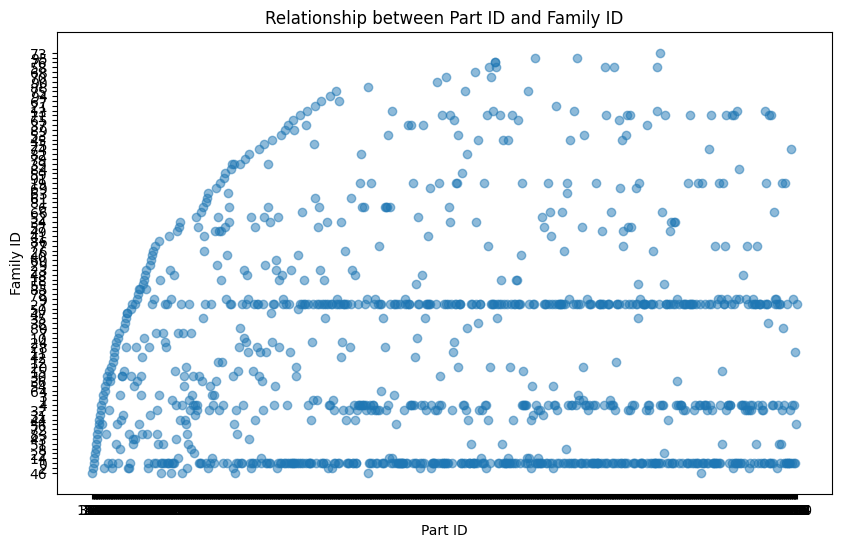


Contingency Table (snippet):
family_id  0  1  10  11  12  13  14  15  18  19
part_id                                        
0          1  0   0   0   0   0   0   0   0   0
1          0  1   0   0   0   0   0   0   0   0
10         0  0   0   0   0   0   0   0   0   0
100        0  0   0   0   0   0   0   0   0   0
1001       1  0   0   0   0   0   0   0   0   0
1002       1  0   0   0   0   0   0   0   0   0
1007       0  0   0   0   0   0   0   0   0   0
101        0  0   0   0   0   0   0   0   1   0
1011       0  0   0   0   0   0   0   0   0   0
1013       0  0   0   0   0   0   0   0   0   0

Chi-squared Test Results:
Chi-squared value: 94047.000
P-value: 4.199e-01
Degrees of freedom: 93960


In [35]:
# Import required libraries
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Cramer's V
def cramers_v(x, y):
    # Create a contingency table
    confusion_matrix = pd.crosstab(x, y)
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    # Total number of samples
    n = confusion_matrix.sum().sum()
    # Get the smaller dimension minus 1
    min_dim = min(confusion_matrix.shape) - 1
    # Calculate and return Cramér's V
    return np.sqrt(chi2 / (n * min_dim))

# Assuming you already have a source for the part data
# Example: Replace `all_parts` with your real data source
parts_data = []
for part in all_parts:  # Replace this with your data source
    parts_data.append({
        'part_id': part.get_part_id(),
        'family_id': part.get_family_id()
    })

# Create a DataFrame
df = pd.DataFrame(parts_data)

# Debug Step 1: Check data statistics
print("Data Overview:")
print(f"Number of rows in the dataset: {len(df)}")
print(f"Number of unique part_id: {df['part_id'].nunique()}")
print(f"Number of unique family_id: {df['family_id'].nunique()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()

# Debug Step 2: Check relationships between part_id and family_id
print("\nChecking mappings:")
part_to_family_mapping = df.groupby('part_id')['family_id'].nunique()
family_to_part_mapping = df.groupby('family_id')['part_id'].nunique()

print(f"Maximum number of family_ids per part_id: {part_to_family_mapping.max()}")
print(f"Maximum number of part_ids per family_id: {family_to_part_mapping.max()}")

# Debug Step 3: Calculate Cramér's V
correlation = cramers_v(df['part_id'], df['family_id'])
print(f"\nCramer's V correlation between part_id and family_id: {correlation:.3f}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['part_id'], df['family_id'], alpha=0.5)
plt.xlabel('Part ID')
plt.ylabel('Family ID')
plt.title('Relationship between Part ID and Family ID')
plt.show()

# Debug Step 4: Inspect the contingency table
confusion_matrix = pd.crosstab(df['part_id'], df['family_id'])
print("\nContingency Table (snippet):")
print(confusion_matrix.iloc[:10, :10])  # Show a snippet of the contingency table

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(confusion_matrix)
print("\nChi-squared Test Results:")
print(f"Chi-squared value: {chi2:.3f}")
print(f"P-value: {p:.3e}")
print(f"Degrees of freedom: {dof}")

In [36]:
# Function to calculate Cramér's V for reverse relationship
def cramers_v_reverse(x, y):
    # Create a contingency table
    confusion_matrix = pd.crosstab(x, y)
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    # Total number of samples
    n = confusion_matrix.sum().sum()
    # Get the smaller dimension minus 1
    min_dim = min(confusion_matrix.shape) - 1
    # Calculate and return Cramér's V
    return np.sqrt(chi2 / (n * min_dim))

# Function to calculate mutual information
from sklearn.metrics import mutual_info_score
def mutual_information(x, y):
    return mutual_info_score(x, y) / np.log(len(x))  # Normalize by log of sample size

# Function to calculate Correlation Ratio (η²)
def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    mean_total = np.mean(values)
    numerator = sum([
        len(values[categories == category]) * (np.mean(values[categories == category]) - mean_total) ** 2
        for category in categories.categories
    ])
    denominator = sum((values - mean_total) ** 2)
    return numerator / denominator if denominator != 0 else 0

# Calculate Cramér's V for reverse relationship
reverse_correlation = cramers_v_reverse(df['family_id'], df['part_id'])
print(f"Cramér's V correlation (family_id → part_id): {reverse_correlation:.3f}")

# Calculate mutual information
mi = mutual_information(df['family_id'], df['part_id'])
print(f"Mutual Information (normalized): {mi:.3f}")

# Calculate correlation ratio
correlation_ratio_value = correlation_ratio(df['family_id'], df['part_id'])
print(f"Correlation Ratio (η²): {correlation_ratio_value:.3f}")

Cramér's V correlation (family_id → part_id): 1.000
Mutual Information (normalized): 0.457


TypeError: Could not convert string '365831473181881114310377333521195586391775713810957173473451681748933857129601570209324100457370351552182486463723921582191791251061924987579469121120266202809771403001522160108142877829710533932146124917823370977142217514557661964942357150249316169204178725116211296845113827952554556665102155119714912379196848630303821352110911816048833119112715016311661107127231548184534141447736114678292255112288247294209527039097612981126198646861654267168131895315118646310749955504222413161662364156988642404115651621495690614493111812283713810996107313172330549604711301013731273261511390752500871141171623524211661704181417981336222791751250302597469251917121757578565494134441819339232248380341920959173254630167392115891193236168052518611612641612502058139632319643773784171558416536531200141806223416967741030215137352119944580277102720843210013461322194296159535127313631043113511117493415795437384212321013097992067172491915577531815681814628979788195433212163122901226674838218441950996113991374325839743136616662625102003628230314533146997083651522113943298455321155434342348278527228373126971093297815073537611300115855719711458442220014422701842738176652664249146831712304521523134611217264818222982521094213163809259851281741299238942676176841028154413671334954625302163104012727541307748380119652917172144814162121395121638612311156488819471267124214985716772434203061454623951558368263361760852285176011198216230382775305683149721891251319166601449127366310611532801139011621608955140214411472662893224091614886416611751209123210481612182931374615316601163205877015118103631151447661192383153814387591089480180122271609241292489413965689570205575018337712250448117622041077506116914101839596143433172197941482201109144287885969314353105743911831815443170132119012101191196118971155211341969121442512571591205617782102505883142212638318161932818362183148712881781139424232747402074102558119081914664296471130199521961327732781160320625851421223201402209418735627112077866521733560190016959815592371124173822481524421827359930399104226011211729188721381727651012873792112539916067121337120110977235879992294924861298213982118197064384742207448581687110376253956494111350211203543136451905825179398611798916885220612255209312462442187877095374157899011023477113119221755124815461117654699192459860294843122140011702068102112431164210096946718721286847187943162212401939140910699067651824820645421350735100715104545621368124517568131799776319103158310441749540922907117211332228157210461002802192129514051241830130114821584554186776810163431674092311167221110261401550531109087254420345810931780191138114289625141215117519123343380684165995861894621542036147534023961514062796578562451305172283274514717922541601105019375171142157111521062142535818917422411409342027675168329972246224716646041362691629561601600805350107913848634751178444481134113263684671105713602806162696371251125292438627437647970222718476252123179496183759291197543784943918861934451024217939386520032269720104112741789478223096615319181575800131313887031581440223829163420599210412221108808400522573103239482215663831805200119431841221216481263518581082191811223441931159862016724364416271332524127119586511481987125619628640157719758104561320265117366674248714488373378543381369258135710671265184310111828980139212541359172110911983139511411913118090314081361720200213181229132317251264215719629831857981385200616401504117410561731669360715195918006211463221568510371982129748819201884320126314171187551169067820092171718071663147817061296395149621061018165313041020466670572' to numeric

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score

# Function to calculate Cramér's V
def cramers_v(x, y):
    """
    Calculate Cramér's V for the association between two categorical variables.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Function to calculate Mutual Information
def mutual_information(x, y):
    """
    Calculate normalized mutual information between two categorical variables.
    """
    return mutual_info_score(x, y) / np.log(len(x))

# Function to calculate Correlation Ratio (η²)
def correlation_ratio(categories, values):
    """
    Calculate the correlation ratio (η²) for a categorical variable explaining a continuous/discrete variable.
    """
    categories = pd.Categorical(categories)
    mean_total = np.mean(values)
    numerator = sum([
        len(values[categories == category]) * (np.mean(values[categories == category]) - mean_total) ** 2
        for category in categories.categories
    ])
    denominator = sum((values - mean_total) ** 2)
    return numerator / denominator if denominator != 0 else 0

# Load dataset (df is your DataFrame with 'family_id' and 'part_id' columns)
# Ensure part_id and family_id are numeric
df['part_id'] = pd.to_numeric(df['part_id'], errors='coerce')
df['family_id'] = pd.to_numeric(df['family_id'], errors='coerce')

# Drop rows with invalid data
df = df.dropna(subset=['part_id', 'family_id'])

# Ensure both columns are integers
df['part_id'] = df['part_id'].astype(int)
df['family_id'] = df['family_id'].astype(int)

# Validate dataset
print(f"Number of rows in the dataset: {len(df)}")
print(f"Number of unique part_id: {df['part_id'].nunique()}")
print(f"Number of unique family_id: {df['family_id'].nunique()}")

# Calculate Reverse Cramér's V
reverse_cramers_v = cramers_v(df['family_id'], df['part_id'])
print(f"Cramér's V (family_id → part_id): {reverse_cramers_v:.3f}")

# Calculate Mutual Information
mi = mutual_information(df['family_id'], df['part_id'])
print(f"Mutual Information (normalized, family_id → part_id): {mi:.3f}")

# Calculate Correlation Ratio
correlation_ratio_value = correlation_ratio(df['family_id'], df['part_id'])
print(f"Correlation Ratio (family_id → part_id): {correlation_ratio_value:.3f}")

Number of rows in the dataset: 1081
Number of unique part_id: 1081
Number of unique family_id: 88
Cramér's V (family_id → part_id): 1.000
Mutual Information (normalized, family_id → part_id): 0.457
Correlation Ratio (family_id → part_id): 0.263
